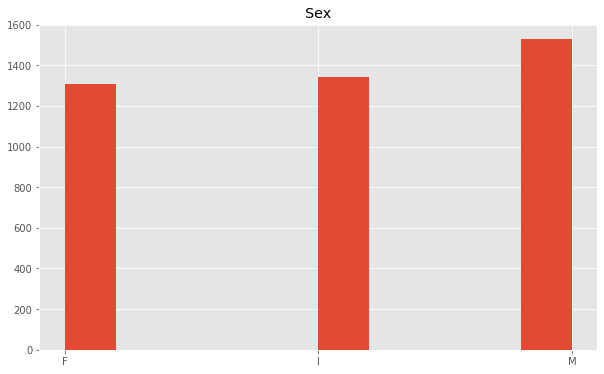

<Figure size 432x288 with 0 Axes>

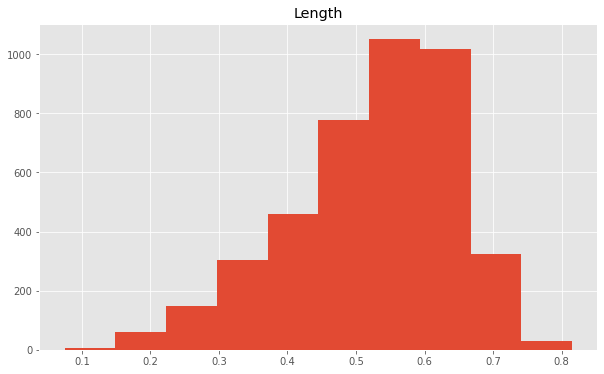

<Figure size 432x288 with 0 Axes>

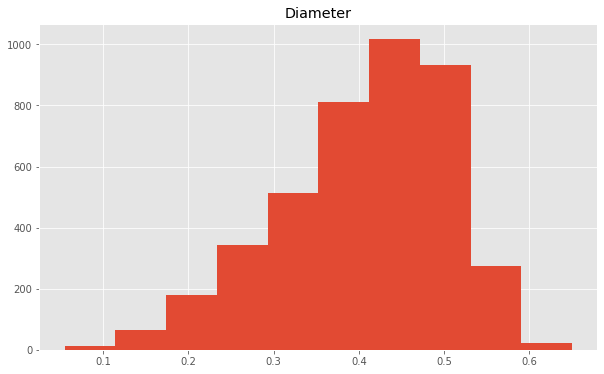

<Figure size 432x288 with 0 Axes>

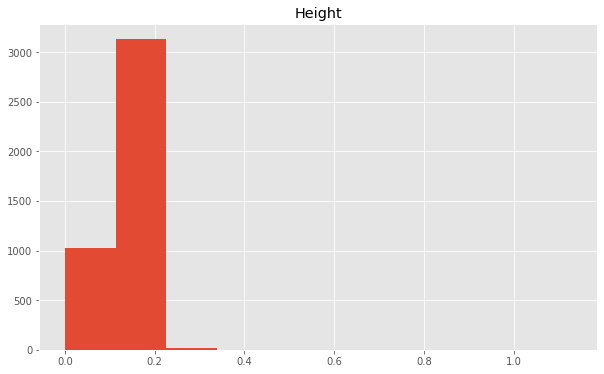

<Figure size 432x288 with 0 Axes>

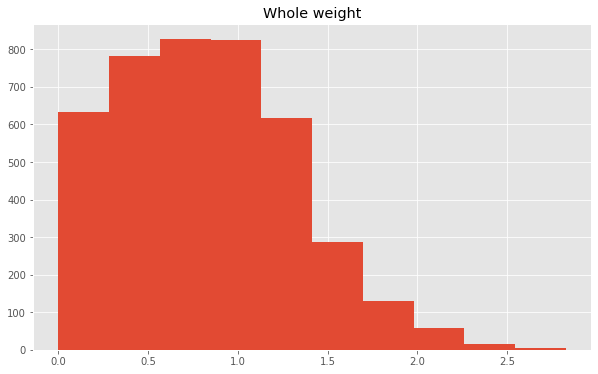

<Figure size 432x288 with 0 Axes>

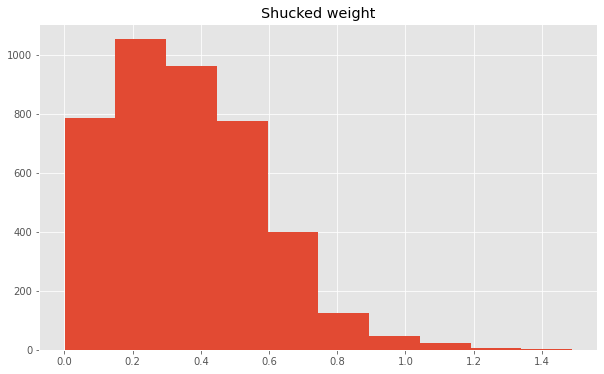

<Figure size 432x288 with 0 Axes>

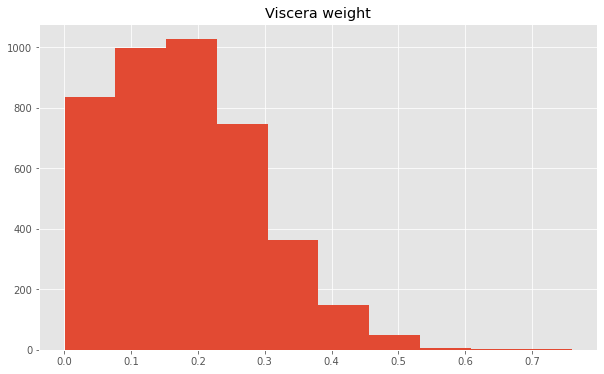

<Figure size 432x288 with 0 Axes>

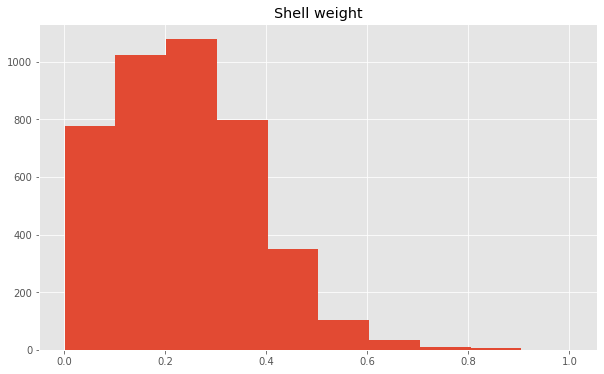

<Figure size 432x288 with 0 Axes>

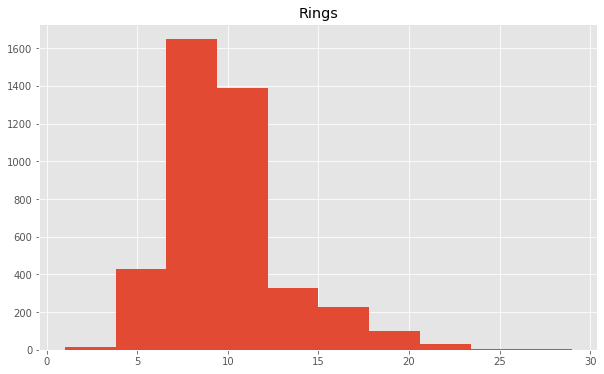

<Figure size 432x288 with 0 Axes>

In [41]:
#Load the necessary python libraries
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
df = pd.read_csv('abalone.data',sep=',',header=None)
df.columns=['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
df.head(5)
df_test=df['Rings']
l=['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
for i in range(0,9):
    plt.figure(figsize=(10.0,6.0))
    plt.title(label=l[i])
    plt.hist(sorted(df.iloc[:,i]))
    plt.show()
    plt.clf()

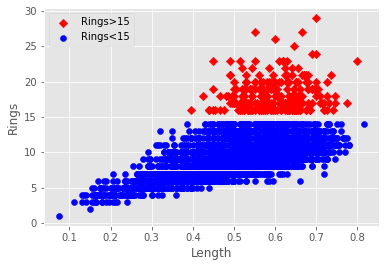

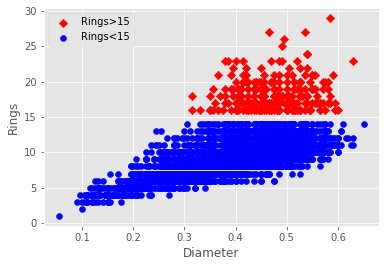

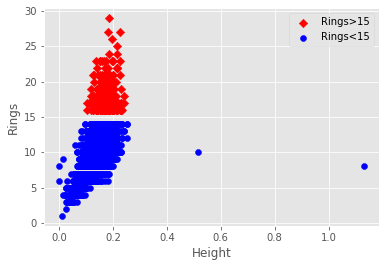

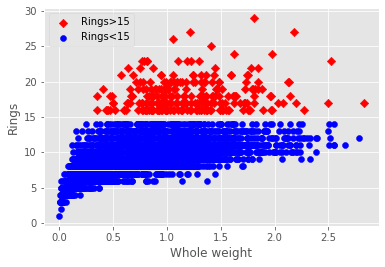

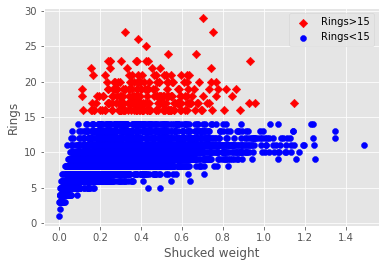

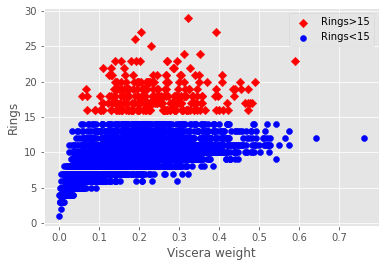

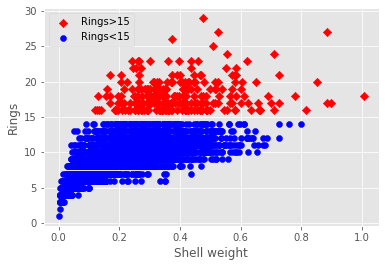

In [42]:
for i in range(1,8):
    plt.scatter(df[l[i]][df.Rings>15].array,
                df['Rings'][df.Rings>15].array,
               marker='D',
               color='red',
               label='Rings>15'
            )

    plt.scatter(df[l[i]][df.Rings<15].array,
                df['Rings'][df.Rings<15].array,
               marker='o',
               color='blue',
               label='Rings<15'
            )
    plt.xlabel(l[i])
    plt.ylabel('Rings')
    plt.legend()
    plt.show()

Through the characteristic scatter diagram, we can find that the size of rings has a linear relationship with each characteristic attribute, in which the length and diameter are obvious. When the length is less than 0.4 or the diameter is less than 0.3, there are almost no rings greater than 15.

In [46]:
for i in range(0,df['Sex'].size):
    if df['Sex'][i]=='I':
        df.loc[i,'Sex']=0
    elif df['Sex'][i]=='M' :
        df.loc[i,'Sex']=1
    else:
        df.loc[i,'Sex']=2
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
X = df.drop('Rings',axis=1).values
y = df['Rings'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42)
lm=linear_model.LinearRegression()
lm.fit(X_train, y_train)

print('model parameter:', lm.coef_)



train_pred = lm.predict(X_train)
test_pred  = lm.predict(X_test)

print("train data mean square error:%.2f" % np.mean((train_pred-y_train)**2))

print("test data mean square error:%.2f" % np.mean((test_pred-y_test)**2))

print("predict score:%.2f" % lm.score(X_test, y_test))


model parameter: [  0.           0.25671853  11.54224615  10.59489109  10.48077452
 -22.30960497  -9.66216346   7.38589188]
train data mean square error:4.97
test data mean square error:4.86
predict score:0.51
